ValueError: object too deep for desired array

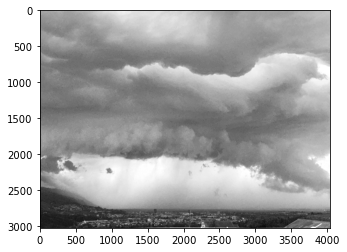

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

x1=Image.open("C:/Users/John/Documents/GitHub/pythonScripts/img1.jpg")
x1=np.array(x1)
plt.imshow(x1)
x2=Image.open("C:/Users/John/Documents/GitHub/pythonScripts/img2.jpg")
x2=np.array(x2)
plt.imshow(x1[:,:,0],cmap='gray')

n=20
def s(x):
    return 2/(1+np.exp(-x))-1

def b(x):
    return s(x/n)/s(1/n)

def c(x):
    return b(x)/b(255)

y1=x2
#y1=np.convolve(y1,np.array([[ 1.0278445 ,  4.10018648,  6.49510362,  4.10018648,  1.0278445 ],
       [ 4.10018648, 16.35610171, 25.90969361, 16.35610171,  4.10018648],
       [ 6.49510362, 25.90969361, 41.0435344 , 25.90969361,  6.49510362],
       [ 4.10018648, 16.35610171, 25.90969361, 16.35610171,  4.10018648],
       [ 1.0278445 ,  4.10018648,  6.49510362,  4.10018648,  1.0278445 ]])/100,mode='same')

#y1=np.zeros(np.shape(x1))
#for i in range(0,3):
#    fftx1=np.fft.fft(x2[:,:,i])
#    fftx2=np.fft.fft(x2[:,:,i])
#    y1raw=np.abs(np.fft.ifft(np.abs(fftx1)*np.exp(1.5j*np.angle(fftx1))))
#    y1[:,:,i]=np.max(x2[:,:,i])/np.max(y1raw)*y1raw
brightness=(y1[:,:,0]+y1[:,:,1]+y1[:,:,2])/(3*255)
brightness=np.transpose(np.mod(5*brightness,1))
#y1=np.mod(2*y1,255)
y1=y1*np.transpose(np.array([brightness,brightness,brightness]))
y1=c(y1)*y1
y1=y1.astype(dtype='uint8')
plt.imshow(y1)
print(y1)
y1=Image.fromarray(y1)
y1.save("phasevsmag.png")